This workbook will compare the results of using a "black box" approach, where we don't use any domain knowledge to reduce the number of variables we use in our model. Instead we will just name them x0,x1....x516.
Changing the column names is also useful to practise.

In [63]:
%pylab inline
import pandas as pd
from numpy import nan as NA
samsungdata = pd.read_csv('/home/sophie/projects/LearnDataScience-master/datasets/samsung/samsungdata.csv')

Populating the interactive namespace from numpy and matplotlib


In [64]:
len(samsungdata.columns)

564

In [65]:
samsungdata.columns[-2:]

Index([u'subject', u'activity'], dtype='object')

In [66]:
sambak = samsungdata # make a copy to experiment on

In [67]:
sambak.columns[0]

'Unnamed: 0'

In [68]:
cols=list(sambak.columns) # get the column names and coerce to a mutable list. A panda index is immutabl
cols[0] = 'Renamed'
print cols[0:5]

['Renamed', 'tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X']


In [69]:
# For each value in cols list change it to x(k) where k is an index integer
newcols = ["x%d" %(k) for k in range(0,len(cols))] # make a list with a new set of column names

In [70]:
newcols[0:5]

['x0', 'x1', 'x2', 'x3', 'x4']

In [71]:
newcols[-2:] = cols[-2:] # replace the last two items with the human readable column names from the original

In [72]:
newcols[-2:]

['subject', 'activity']

In [73]:
sambak.columns = newcols # replace the orig columns with newcols

In [74]:
sambak.columns[0] # check the name

'x0'

In [75]:
sambak['x0'][0:10] # check the value - this is the row index

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: x0, dtype: int64

In [76]:
sambak2 = sambak[sambak.columns[1:-2]] # drop the first and last two columns to just get the independent vars

In [77]:
sambak2['x1'][0:5] # check to see it's there

0    0.288585
1    0.278419
2    0.279653
3    0.279174
4    0.276629
Name: x1, dtype: float64

In [78]:
samsungdata['subject'].value_counts() # How many rows does each subject attached to them?

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

Now we make the test, training and validation datasets from this altered data.
Do we need to be using sambak? Or did we just use it to make the column name list from?

In [79]:
samtest = samsungdata[samsungdata['subject'] >= 27] # only use 28,29 and 30 as test data?

In [80]:
samtrain = samsungdata[samsungdata['subject'] <= 6] # anything less than or equal to to be used as the training data set

In [81]:
samval2 = samsungdata[samsungdata['subject'] < 27] # anything less than 27 for the validation set? Seems a lot?
print samval2.columns # how did these acquire the x1,x2 columns names etc?

Index([u'x0', u'x1', u'x2', u'x3', u'x4', u'x5', u'x6', u'x7', u'x8', u'x9',
       ...
       u'x554', u'x555', u'x556', u'x557', u'x558', u'x559', u'x560', u'x561',
       u'subject', u'activity'],
      dtype='object', length=564)


In [82]:
samval = samval2[samsungdata['subject'] >=21] # Taking a subset from the samval2 set, where subject is less than 21.

/home/sophie/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [83]:
samval['subject'].unique()

array([21, 22, 23, 25, 26])

In [84]:
samtrain['subject'].unique()

array([1, 3, 5, 6])

In [85]:
samtest['subject'].unique()

array([27, 28, 29, 30])

We have created a validation set with 5 subjects, a training set with 4 and a test set with 4. Why so few?
Now we are ready to create, validate and test a model.

In [86]:
cd /home/sophie/projects/Samsung/bin/

/home/sophie/projects/Samsung/bin


In [87]:
import randomforests as rf
# we don't need to apply the remap_col this time
print samtrain['activity'][0:5]
samtrain['activity'].unique()

0    standing
1    standing
2    standing
3    standing
4    standing
Name: activity, dtype: object


array(['standing', 'sitting', 'laying', 'walk', 'walkdown', 'walkup'], dtype=object)

In [88]:
import sklearn.ensemble as sk

rfc = sk.RandomForestClassifier(n_estimators=50, oob_score=True)
train_data = samtrain[samtrain.columns[1:-2]]
train_truth = samtrain['activity']
model = rfc.fit(train_data, train_truth)

In [89]:
rfc.oob_score_

0.9825095057034221

In [95]:
fi = enumerate(rfc.feature_importances_)
cols = samtrain.columns
[(value,cols[i]) for (i,value) in fi if value > 0.02]

[(0.025912798195718185, 'x40'),
 (0.031371517312297648, 'x41'),
 (0.023318216042219553, 'x49'),
 (0.020765679257202883, 'x50'),
 (0.038800786813071558, 'x52'),
 (0.040611882194838786, 'x53'),
 (0.035483131016246144, 'x56'),
 (0.023447285046123017, 'x558'),
 (0.024952970777081852, 'x559')]

In [96]:
fi = enumerate(rfc.feature_importances_)  # relative importances of each feature. 
cols = samtrain.columns
top10 = [(cols[i]) for (i,value) in fi if value > 0.017]  # As we have a lot more features, this threshold value is lower.
top10

['x40', 'x41', 'x49', 'x50', 'x52', 'x53', 'x56', 'x558', 'x559']

In [97]:
# pandas data frame adds a spurious unknown column in 0 position hence starting at col 1
# not using subject column, activity ie target is in last columns hence -2 i.e dropping last 2 cols

val_data = samval[samval.columns[1:-2]]
val_truth = samval['activity']
val_pred = rfc.predict(val_data)

test_data = samtest[samtest.columns[1:-2]]
test_truth = samtest['activity']
test_pred = rfc.predict(test_data)

In [99]:
print("mean accuracy score for validation set = %f" %(rfc.score(val_data, val_truth)))
print("mean accuracy score for test set = %f" %(rfc.score(test_data, test_truth)))

mean accuracy score for validation set = 0.845426
mean accuracy score for test set = 0.934680


In [107]:
import sklearn.metrics as skm
test_cm = skm.confusion_matrix(test_truth,test_pred)
val_cm = skm.confusion_matrix(val_truth,val_pred)

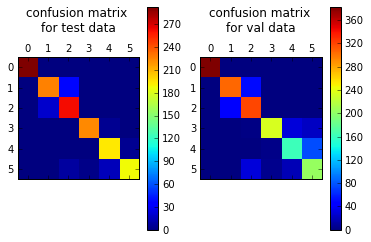

In [123]:
import matplotlib.pyplot as pl  # I don't think it matters it you import pylab or matplotlib.pyplot

fig = pl.figure()

fig.add_subplot(121)
pl.matshow(test_cm,fignum=0)
pl.title('confusion matrix \nfor test data\n')
pl.colorbar()


fig.add_subplot(122)
pl.matshow(val_cm, fignum=0)
pl.title('confusion matrix \nfor val data\n')
pl.colorbar()
pl.show()


Again this shows more agreement between true and predicted classes for the first features.

In [124]:
# Now some commonly used measures of prediction "goodness"

In [126]:
# Accuracy : f the entire set of predicted labels for a sample strictly match with the true set of labels, 
# then the subset accuracy is 1.0; otherwise it is 0.0.
print ("Accuracy = %f" %(skm.accuracy_score(test_truth,test_pred)))
# Precision: Intuitively, precision is the ability of the classifier not to label as positive a sample that is negative, 
# and recall is the ability of the classifier to find all the positive samples.
print ("Precision = %f" %(skm.precision_score(test_truth,test_pred)))
# Recall. ratio of true positives to false negatives.
print ("Recall = %f" %(skm.recall_score(test_truth,test_pred)))
# F1 Score: Also known as F-score. weighted average of the precision and recall.
# F1 = 2 * (precision * recall) / (precision + recall)
print ("F1 score = %f" %(skm.f1_score(test_truth,test_pred)))

Accuracy = 0.934680
Precision = 0.936931
Recall = 0.934680
F1 score - 0.934711


/home/sophie/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/home/sophie/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1

So, How does this compare with our domain-knowledge model: 
Accuracy = 0.891582
Precision = 0.894418
Recall = 0.891582
F1 score = 0.892030

The black-box is a clear winner. 
We have no idea what the variables are, but we did save some time formatting the column names and reducing our features.
Next, we can map our black-box features back to the original column names

In [135]:
print top10[0][1:]  # This is a neat trick for just extracting parts of a string.
origindx = [int(x[1:]) for x in top10]   # the int() then turns the number back to int from string

40


In [136]:
origindx

[40, 41, 49, 50, 52, 53, 56, 558, 559]

In [138]:
samorig = pd.read_csv('/home/sophie/projects/LearnDataScience-master/datasets/samsung/samsungdata.csv')

In [139]:
samorig.columns[origindx]  # use the numbers to index the column names. 

Index([u'tBodyAcc-correlation()-Y,Z', u'tGravityAcc-mean()-X',
       u'tGravityAcc-mad()-Z', u'tGravityAcc-max()-X', u'tGravityAcc-max()-Z',
       u'tGravityAcc-min()-X', u'tGravityAcc-sma()',
       u'angle(tBodyGyroJerkMean,gravityMean)', u'angle(X,gravityMean)'],
      dtype='object')

This gives us the columns in the original dataset that are most important for deciding on the class.